<a href="https://colab.research.google.com/github/Aleksandr62aa/ML_DL/blob/main/Tree_reg_class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Decision tree in classification problem**

**Importing libraries**

In [ ]:
from __future__ import division, print_function
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
%matplotlib inline
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor

Train dataset

In [ ]:
# class one
np.random.seed(7)
train_data = np.random.normal(size=(100, 2))
train_labels = np.zeros(100)

# add a second class
train_data = np.r_[train_data, np.random.normal(size=(100, 2), loc=2)]
train_labels = np.r_[train_labels, np.ones(100)]


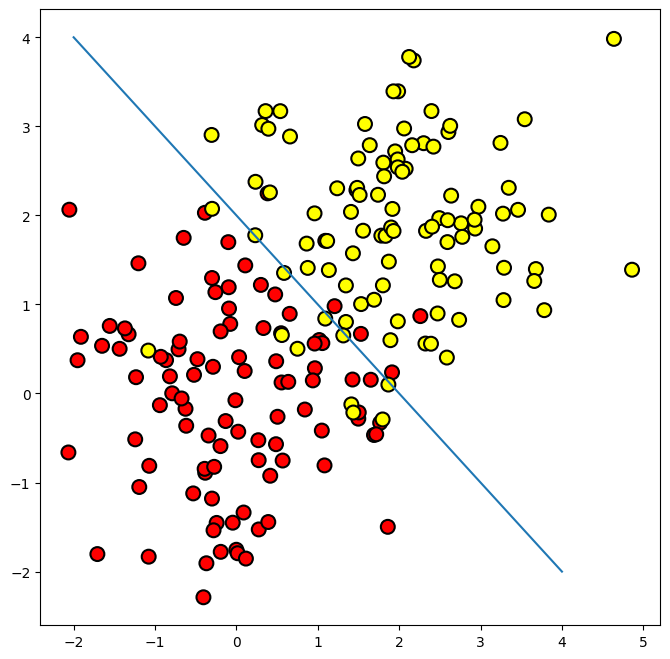

In [ ]:
# data visualization
plt.rcParams['figure.figsize'] = (8,8)
plt.scatter(train_data[:, 0], train_data[:, 1], c=train_labels, s=100,
cmap='autumn', edgecolors='black', linewidth=1.5);
plt.plot(range(-2,5), range(4,-3,-1));


**Tree training and boundary visualization**

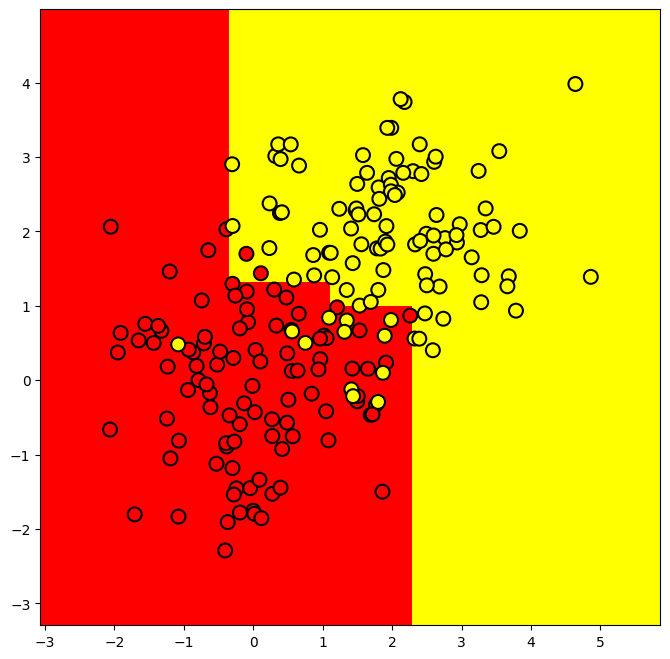

In [ ]:
# helper function for isualization
def get_grid(data):
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    return np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

clf_tree = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=17)

# Tree training
clf_tree.fit(train_data, train_labels)

# boundary visualization
xx, yy = get_grid(train_data)

predicted = clf_tree.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.pcolormesh(xx, yy, predicted, cmap='autumn')
plt.scatter(train_data[:, 0], train_data[:, 1], c=train_labels, s=100,
cmap='autumn', edgecolors='black', linewidth=1.5);

**Decision tree in a regression problem**

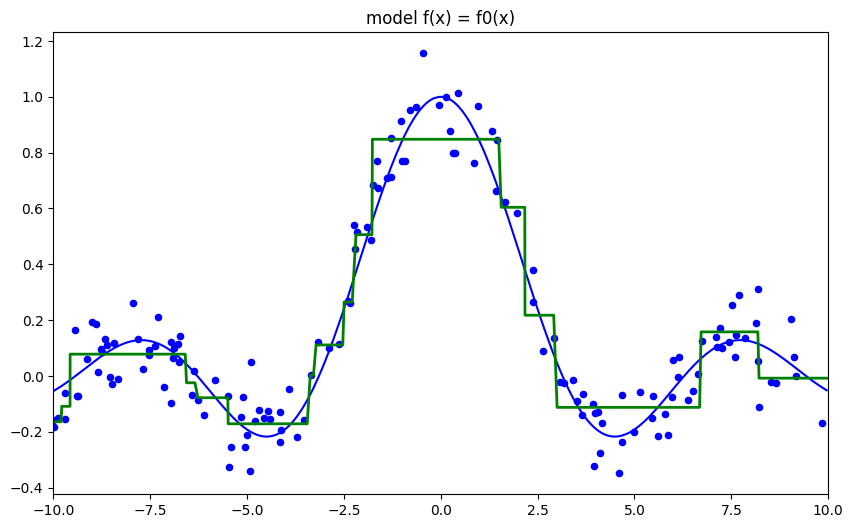

In [ ]:
# Train dataset
n_train = 150
n_test = 1000
noise = 0.1

def f(x):
    x = x.ravel()
    return np.sin(x)/x
    # return np.exp(-x ** 2) + 1.5 * np.exp(-(x - 2) ** 2)

def generate(n_samples, noise):
    X = np.random.rand(n_samples) * 20 - 10
    X = np.sort(X).ravel()
    y = f(X) + np.random.normal(0.0, noise, n_samples)
    X = X.reshape((n_samples, 1))
    return X, y

X_train, y_train = generate(n_samples=n_train, noise=noise)
X_test, y_test = generate(n_samples=n_test, noise=noise)

reg_tree = DecisionTreeRegressor(max_depth=4, random_state=17)

# Tree training
reg_tree.fit(X_train, y_train)
reg_tree_pred = reg_tree.predict(X_test)

plt.figure(figsize=(10, 6))
plt.plot(X_test, f(X_test), "b")
plt.scatter(X_train, y_train, c="b", s=20)
plt.plot(X_test, reg_tree_pred, "g", lw=2)
plt.xlim([-10, 10])
plt.title("model f(x) = f0(x)")
plt.show()

**Algorithm Gradient Boosting Machine (GBM)**

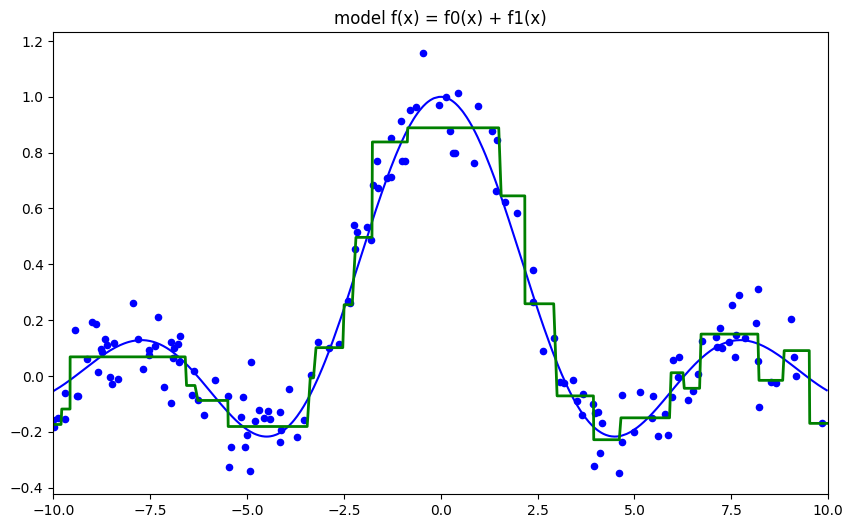

In [ ]:
# model f1(x)
reg_tree_1 = DecisionTreeRegressor(max_depth=4, random_state=17)

# Tree training
reg_tree_1.fit(X_train,  y_train - reg_tree.predict(X_train))
reg_tree_pred_1 = reg_tree.predict(X_test) + reg_tree_1.predict(X_test)

plt.figure(figsize=(10, 6))
plt.plot(X_test, f(X_test), "b")
plt.scatter(X_train, y_train, c="b", s=20)
plt.plot(X_test, reg_tree_pred_1, "g", lw=2)
# plt.plot(X_test, reg_tree_pred, "g", lw=2)
plt.xlim([-10, 10])
plt.title("model f(x) = f0(x) + f1(x)")
plt.show()

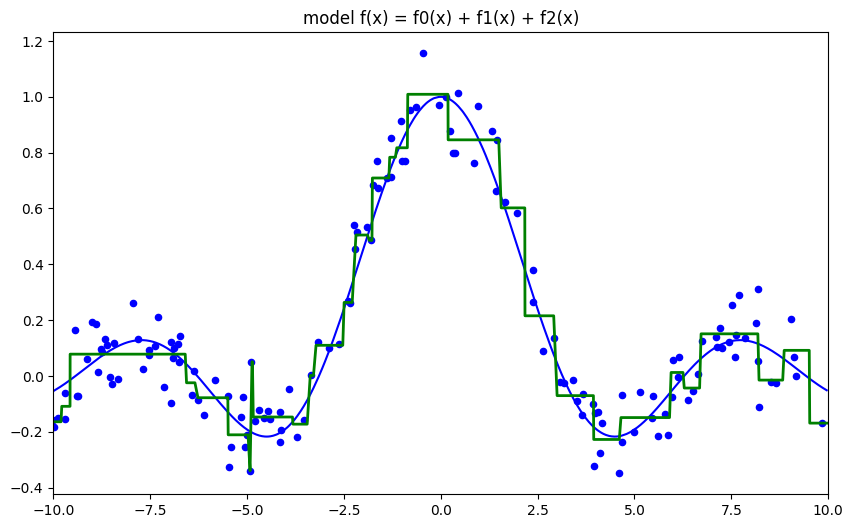

In [ ]:
# model f2(x)
reg_tree_2 = DecisionTreeRegressor(max_depth=4, random_state=17)

# Tree training
reg_tree_2.fit(X_train,  y_train - (reg_tree.predict(X_train) + reg_tree_1.predict(X_train)))
reg_tree_pred_2 = reg_tree.predict(X_test) + reg_tree_1.predict(X_test) + reg_tree_2.predict(X_test)

plt.figure(figsize=(10, 6))
plt.plot(X_test, f(X_test), "b")
plt.scatter(X_train, y_train, c="b", s=20)
plt.plot(X_test, reg_tree_pred_2, "g", lw=2)
# plt.plot(X_test, reg_tree_pred, "g", lw=2)
plt.xlim([-10, 10])
plt.title("model f(x) = f0(x) + f1(x) + f2(x)")
plt.show()

**Decision trees and the nearest neighbors method in the MNIST handwritten digit recognition problem**

In [ ]:
# Train dataset
from sklearn.datasets import load_digits

data = load_digits()
X, y = data.data, data.target


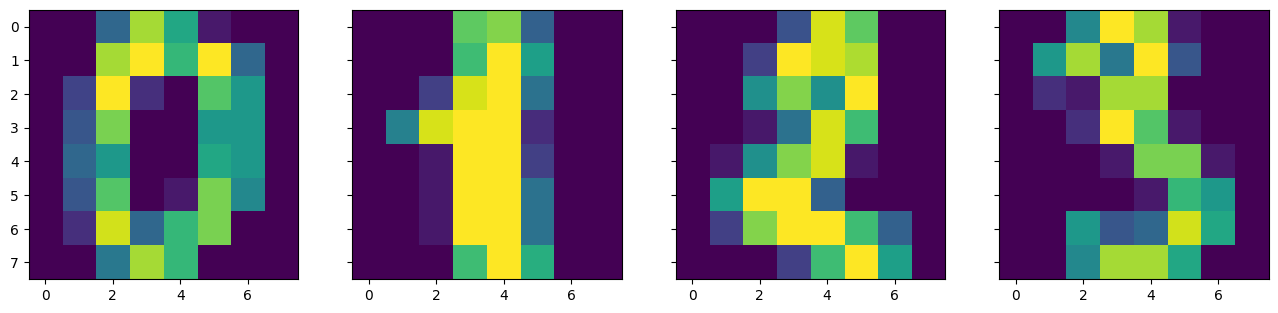

In [ ]:
f, axes = plt.subplots(1, 4, sharey=True, figsize=(16,6))
for i in range(4):
  axes[i].imshow(X[i,:].reshape([8,8]));

In [ ]:
X_train, X_holdout, y_train, y_holdout = train_test_split(X, y, test_size=0.3,
random_state=17)

In [ ]:
# tree learning and KNN
tree = DecisionTreeClassifier(max_depth=5, random_state=17)
knn = KNeighborsClassifier(n_neighbors=10)

tree.fit(X_train, y_train)
knn.fit(X_train, y_train);

In [ ]:
# accuracy knn, tree
tree_pred = tree.predict(X_holdout)
knn_pred = knn.predict(X_holdout)
print("accuracy knn = ", "%.2f" % accuracy_score( y_holdout, knn_pred))
print("accuracy tree = ", "%.2f" % accuracy_score(y_holdout, tree_pred))

accuracy knn =  0.97
accuracy tree =  0.67
